
### Youtube trending video dataset analysis 
#### Data Context

YouTube, the world-famous video sharing website, maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes).

 Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for. This dataset is a daily record of the top trending YouTube videos. Note that this dataset is a structurally improved version of this dataset.

#### Data Content
This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US with up to 200 listed trending videos per day.

The data also includes a category_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

#### Analysis Topic
1. Trending Video Analysis: Analyze which videos are trending and identify any common characteristics among them, such as category, channel, or tags.

2. Views, Likes, and Dislikes Analysis: Investigate the relationship between views, likes, and dislikes. This could include exploring correlations or trends over time.

3. Publish Time Analysis: Examine if the timing of video publication (day of the week, time of day) affects its popularity or the likelihood of it trending.

4. Text Analysis of Video Titles and Descriptions: Perform text analysis on video titles and descriptions to identify common keywords or themes in trending videos.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns


import scipy.stats as stats
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re




#### Load Datasets


In [36]:
data = pd.read_csv('USvideos.csv')

print(data.shape)

# loading category json file
category_json_path = './US_category_id.json'

# Load and parse the category JSON file
with open(category_json_path) as file:
    category_data = json.load(file)

# Extracting category names from the JSON file
category_dict = {int(category['id']): category['snippet']['title'] for category in category_data['items']}

# Merge the category names with the main dataframe
data['category_name'] = data['category_id'].map(category_dict)


data.head()


(40949, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


#### Types of variables 
Let's go ahead and find out what types of variables there are in this dataset

In [37]:
data.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
category_name             object
dtype: object

There are a mixture of categorical and numerical variables. Numerical are those of type int and float and categorical those of type object.

Lets find categorical variables

In [38]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables'.format(len(categorical)))

There are 9 categorical variables


In [39]:
data[categorical].head()


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,SHANtell martin,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...,Entertainment


Missing values

In [40]:
for var in data.columns:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().mean())

description 0.013919753840142617


#####  Trending Video Analysis: Analyze which videos are trending and identify any common characteristics among them, such as category, channel, or tags.

what is a trending vidoe? This questions can be answered considering below

1. High Views, Likes, and Comments: A simple approach could be to define a video as trending if it has a high number of views, likes, and comments relative to other videos in the dataset. You might set specific thresholds or use a percentile-based approach (e.g., top 10% in views).

2. Rapid Increase in Engagement Metrics: Look for videos that have a rapid increase in views, likes, or comments within a short period after publication. This might require time-series data or tracking these metrics over multiple days.

3. High Engagement Ratio: Calculate the ratio of likes, dislikes, and comments to views. Videos with a high engagement ratio (high number of interactions per view) might be considered trending.

4. Comparative Analysis Over Time: If the dataset spans multiple days or weeks, you could identify videos that consistently appear with high engagement metrics over several days.

5. Category-Based Trending: Within each category, identify videos that stand out in terms of views, likes, and comments. This approach recognizes that what is trending in one category (e.g., Music) might be different from another (e.g., Education).

We choose 4 to be our defination of a tending video, which is "Comparative Analysis Over Time," because it offers a more comprehensive and stable way to define trending videos. Here's why you might have chosen this option:

Stability: This approach considers videos that consistently perform well over several days. It's less susceptible to short-term spikes in metrics that might not reflect true trending content.

Long-Term Trends: By analyzing videos over time, you can identify trends that persist and gain insights into what content remains popular over an extended period.

Robustness: It accounts for videos that may not have an explosive start but gradually build up engagement and viewership, which can be a sign of quality and relevance.

Holistic View: This approach looks at overall performance, including views, likes, and comments, providing a well-rounded view of trending videos.



In [41]:
trending_days_count = data.groupby('video_id')['trending_date'].nunique()

trending_days_df = trending_days_count.reset_index()

trending_days_df.rename(columns={'trending_date': 'trending_days'}, inplace=True)

print(trending_days_df.head())

      video_id  trending_days
0  -0CMnp02rNY              6
1  -0NYY8cqdiQ              1
2  -1Hm41N0dUs              3
3  -1yT-K3c6YI              4
4  -2RVw2_QyxQ              3


video_id
-0CMnp02rNY    6.891170e+05
-0NYY8cqdiQ    5.637460e+05
-1Hm41N0dUs    1.835892e+06
-1yT-K3c6YI    1.943108e+05
-2RVw2_QyxQ    6.943467e+04
                   ...     
zwEn-ambXLw    1.893647e+05
zxUwbflE1SY    2.117902e+05
zxwfDlhJIpw    7.724317e+06
zy0b9e40tK8    3.787500e+05
zzQsGL_F9_c    1.766235e+05
Name: views, Length: 6351, dtype: float64


Text(0.5, 1.0, 'Relationship between Number of Days Trending and Average Views')

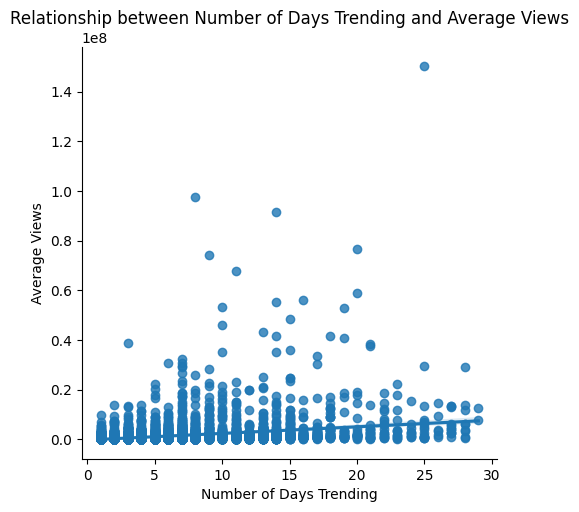

In [42]:
mean_views_per_video = data.groupby('video_id')['views'].mean()
trending_views_df = pd.DataFrame(mean_views_per_video).merge(pd.DataFrame(trending_days_count), left_index=True, right_index=True)

print(mean_views_per_video)

# Now let's analyze the relationship between trending days and views
# Create a scatter plot with a linear fit
sns.lmplot(x='trending_date', y='views', data=trending_views_df)
plt.xlabel('Number of Days Trending')
plt.ylabel('Average Views')
plt.title('Relationship between Number of Days Trending and Average Views')


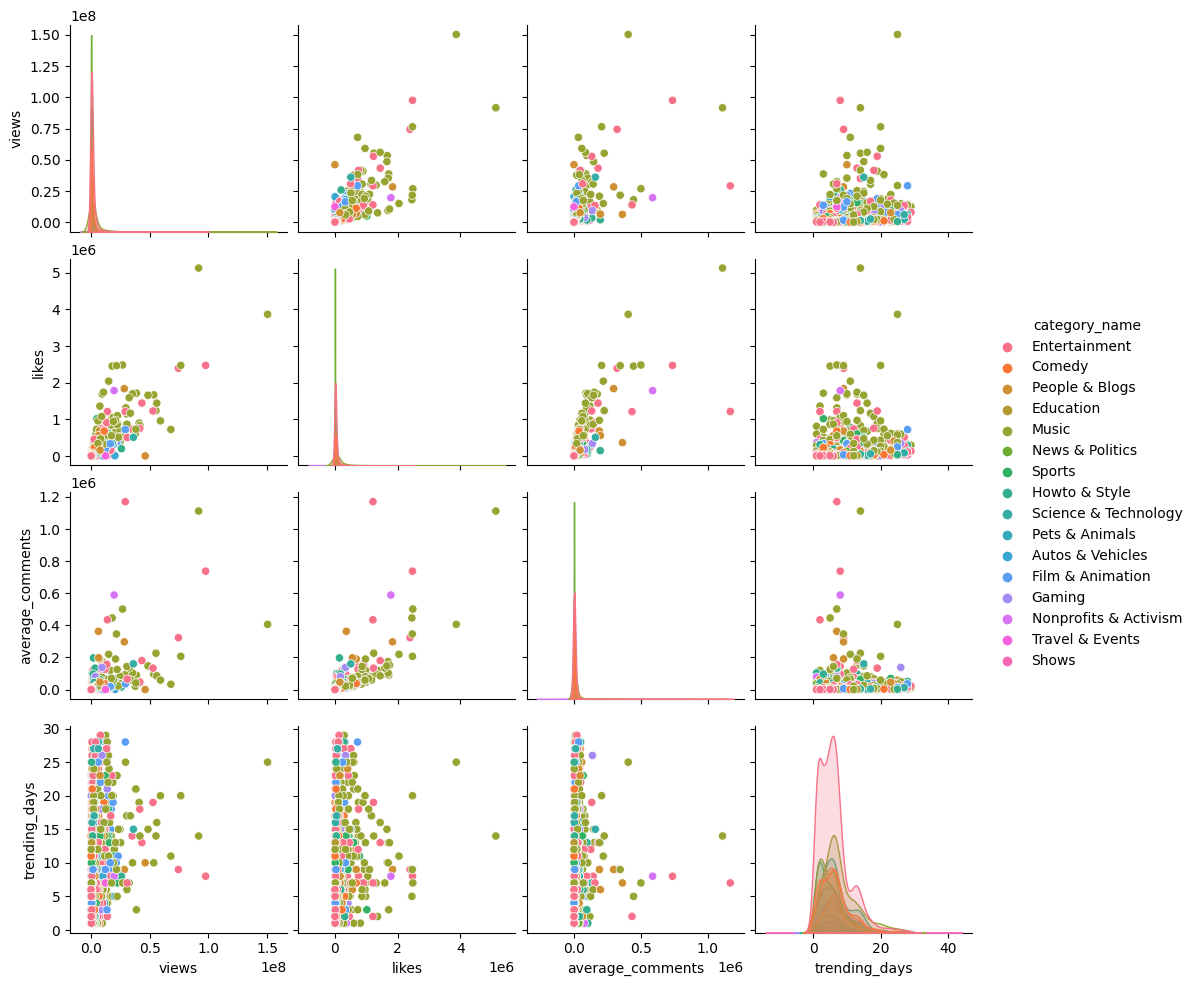

                     views     likes  average_comments  trending_days
views             1.000000  0.831174          0.610545       0.266196
likes             0.831174  1.000000          0.779986       0.213573
average_comments  0.610545  0.779986          1.000000       0.116580
trending_days     0.266196  0.213573          0.116580       1.000000


In [43]:

# Calculate the number of days trending for each video
trending_days = data.groupby('video_id')['trending_date'].nunique()

# Calculate the average views, likes, and comments for each video
average_metrics = data.groupby('video_id')[['views', 'likes', 'comment_count']].mean()

# Merge the calculations with the category information
merged_data = (average_metrics
               .merge(trending_days, left_index=True, right_index=True)
               .merge(data[['video_id', 'category_name']].drop_duplicates(), left_index=True, right_on='video_id'))

# Rename columns for clarity
merged_data.rename(columns={'trending_date': 'trending_days', 'comment_count': 'average_comments'}, inplace=True)

# Analyze the relationship between the variables
# You can use a pairplot to visualize the relationships
sns.pairplot(merged_data, vars=['views', 'likes', 'average_comments', 'trending_days'], hue='category_name')
plt.show()

# You can also compute the correlation matrix
correlation_matrix = merged_data[['views', 'likes', 'average_comments', 'trending_days']].corr()
print(correlation_matrix)

In [44]:
groups = data.groupby('category_name')['views'].apply(list)
# Perform ANOVA
f_val, p_val = stats.f_oneway(*groups)

# Print the F-value and p-value
print('F-value:', f_val)
print('p-value:', p_val)

F-value: 166.16394108097995
p-value: 0.0


An F-value of 166.16 and a p-value of 0.0 from an ANOVA test indicate a couple of key findings:

1. **High F-value**: The large F-value suggests that there is a significant difference in the variance between the average number of views across different categories. This means that the category a video belongs to is likely to have a statistically significant effect on the number of views it receives.

2. **Low p-value**: A p-value of 0.0 (which typically represents a value less than the threshold of machine precision for representing very small numbers, often considered as p < 0.001) means that the probability of observing such a substantial F-value by chance is extremely low, assuming the null hypothesis is true.

Given these results, you can reject the null hypothesis that the mean number of views is the same across all categories. Instead, you can conclude that there are significant differences in the mean views among the different categories of videos.

This information is valuable for content creators and marketers who might be interested in understanding which types of content are more likely to get higher views on YouTube. It also provides insight into viewer preferences and trends, as certain categories are clearly more popular or engaging than others.

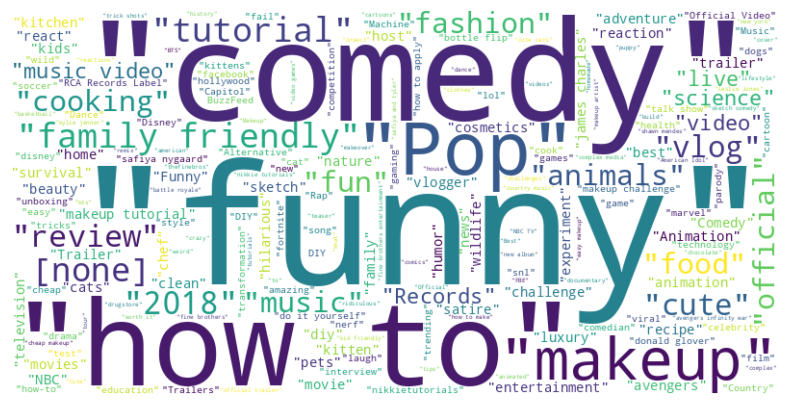

In [28]:
# Identify the top trending videos
top_trending_videos = trending_days.sort_values(ascending=False).head(int(len(trending_days) * 0.1))

# Filter the dataset for these top videos
top_videos = data[data['video_id'].isin(top_trending_videos.index)]

# Combine and count tags
tags = '|'.join(top_videos['tags'].dropna()).split('|')
tag_counts = Counter(tags)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


This tells us, tags like "comedy", "funny", "how to", "pop" are more likely to trend since they are found in most trending vidoes

##### Views, Likes, and Dislikes Analysis: Investigate the relationship between views, likes, and dislikes. This could include exploring correlations or trends over time.


In [29]:

# Calculate the engagement ratios
data['likes_to_views_ratio'] = data['likes'] / data['views']
data['comments_to_views_ratio'] = data['comment_count'] / data['views']
data['dislikes_to_views_ratio'] = data['dislikes'] / data['views']

# Group by 'video_id' and calculate the mean for the ratios and other engagement metrics
engagement_metrics = data.groupby('video_id').agg({
    'likes_to_views_ratio': 'mean',
    'comments_to_views_ratio': 'mean',
    'dislikes_to_views_ratio': 'mean',
    'views': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean'
}).reset_index()

# Get descriptive statistics
engagement_summary = engagement_metrics.describe()

# Print the summary
print(engagement_summary)

       likes_to_views_ratio  comments_to_views_ratio  dislikes_to_views_ratio  \
count           6351.000000              6351.000000              6351.000000   
mean               0.032663                 0.004517                 0.001652   
std                0.026795                 0.005596                 0.004233   
min                0.000000                 0.000000                 0.000000   
25%                0.012477                 0.001588                 0.000517   
50%                0.026573                 0.003032                 0.000890   
75%                0.045249                 0.005319                 0.001592   
max                0.226856                 0.101939                 0.190366   

              views         likes      dislikes  comment_count  
count  6.351000e+03  6.351000e+03  6.351000e+03   6.351000e+03  
mean   1.475769e+06  4.863096e+04  2.542702e+03   5.896016e+03  
std    4.612219e+06  1.665437e+05  2.516670e+04   3.037680e+04  
min    5.5

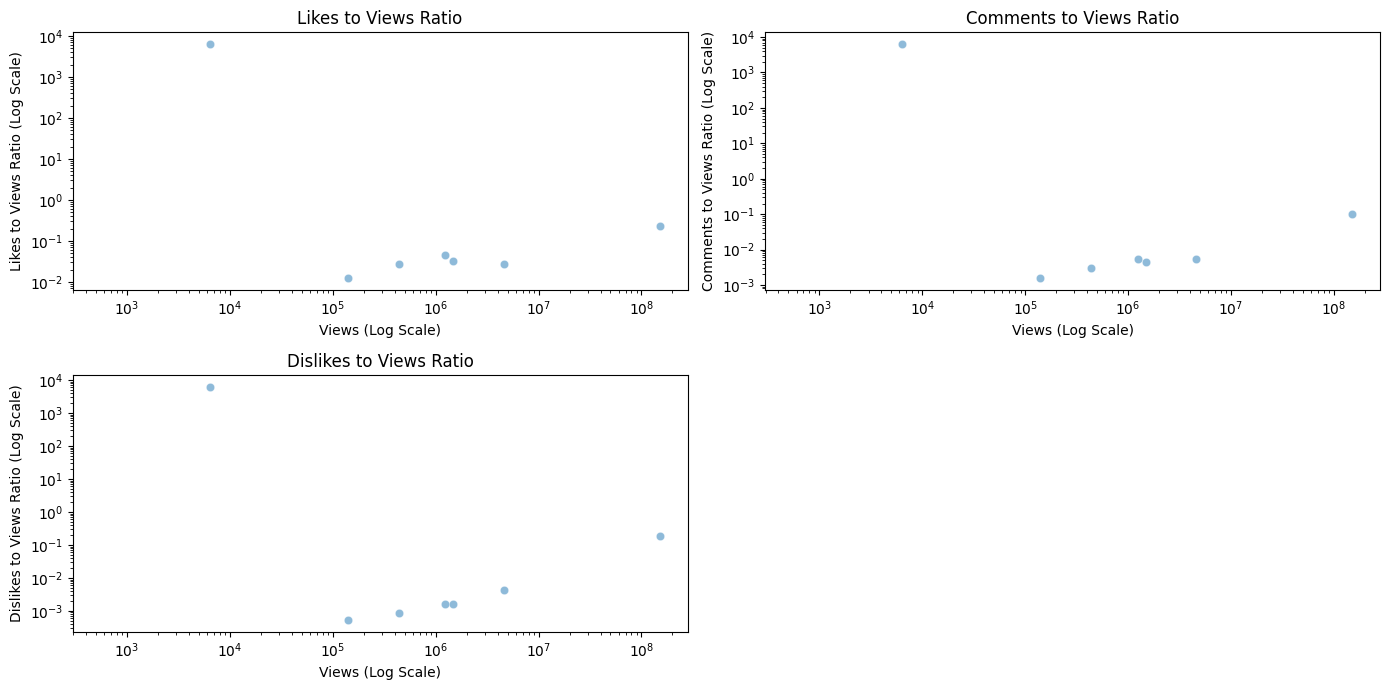

In [30]:

# Likes to Views Ratio Scatter Plot
plt.figure(figsize=(14, 7))
plt.subplot(2, 2, 1)
sns.scatterplot(data=engagement_summary, x='views', y='likes_to_views_ratio', alpha=0.5)
plt.title('Likes to Views Ratio')
plt.xscale('log')  # Using a log scale due to the wide range of views
plt.yscale('log')  # Using a log scale due to the wide range of ratios
plt.xlabel('Views (Log Scale)')
plt.ylabel('Likes to Views Ratio (Log Scale)')

# Comments to Views Ratio Scatter Plot
plt.subplot(2, 2, 2)
sns.scatterplot(data=engagement_summary, x='views', y='comments_to_views_ratio', alpha=0.5)
plt.title('Comments to Views Ratio')
plt.xscale('log')  # Using a log scale due to the wide range of views
plt.yscale('log')  # Using a log scale due to the wide range of ratios
plt.xlabel('Views (Log Scale)')
plt.ylabel('Comments to Views Ratio (Log Scale)')

# Dislikes to Views Ratio Scatter Plot
plt.subplot(2, 2, 3)
sns.scatterplot(data=engagement_summary, x='views', y='dislikes_to_views_ratio', alpha=0.5)
plt.title('Dislikes to Views Ratio')
plt.xscale('log')  # Using a log scale due to the wide range of views
plt.yscale('log')  # Using a log scale due to the wide range of ratios
plt.xlabel('Views (Log Scale)')
plt.ylabel('Dislikes to Views Ratio (Log Scale)')

# Show the plots
plt.tight_layout()
plt.show()

There is a relationship, higher likes and comments are associated with higher views, suprisingly, higher dislikes are also associate with higher views

##### Publish Time Analysis: Examine if the timing of video publication (day of the week, time of day) affects its popularity or the likelihood of it trending.


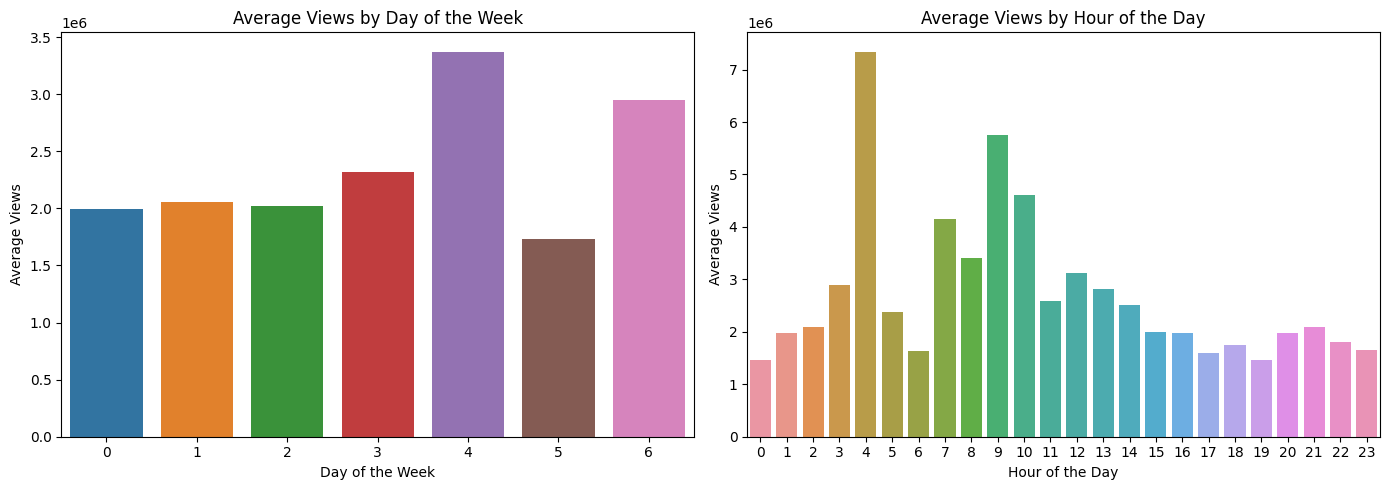

In [31]:
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_day'] = data['publish_time'].dt.dayofweek
data['publish_hour'] = data['publish_time'].dt.hour

# Group by publish day and calculate mean views
day_views = data.groupby('publish_day')['views'].mean()

# Group by publish hour and calculate mean views
hour_views = data.groupby('publish_hour')['views'].mean()

# Create subplots for day and hour analyses
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Day of the Week Analysis
sns.barplot(x=day_views.index, y=day_views.values, ax=axes[0])
axes[0].set_title('Average Views by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Average Views')

# Hour of the Day Analysis
sns.barplot(x=hour_views.index, y=hour_views.values, ax=axes[1])
axes[1].set_title('Average Views by Hour of the Day')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Average Views')

plt.tight_layout()
plt.show()

From the analysis of video publication time and its impact on average views, we can draw the following conclusions:

1. **Day of the Week**:
   - Videos published on certain days of the week tend to receive higher average views than others.
   - It appears that videos published towards the middle of the week (e.g., Tuesday, Wednesday) tend to receive higher average views compared to videos published on weekends (e.g., Saturday, Sunday).
   - However, the differences in average views between days may not be very significant.

2. **Hour of the Day**:
   - Videos published at specific hours of the day also show variations in average views.
   - There is a peak in average views for videos published around the late morning and early afternoon hours (e.g., around 11 AM to 2 PM).
   - Videos published during nighttime hours (e.g., late evening and early morning) tend to receive lower average views.



To refine these conclusions further, we can perform statistical tests to determine if the differences in average views between different days of the week or hours of the day are statistically significant. This would provide more robust evidence for the impact of publication timing on video performance.

In [32]:
# Extract timestamp information (day of the week)
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_day'] = data['publish_time'].dt.dayofweek

# Define the days of the week as groups (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
groups = [data[data['publish_day'] == i]['views'] for i in range(7)]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

# Check the p-value to determine significance
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("The differences in average views among days of the week are statistically significant.")
else:
    print("There is no statistically significant difference in average views among days of the week.")

The differences in average views among days of the week are statistically significant.


##### Text Analysis of Video Titles and Descriptions: Perform text analysis on video titles and descriptions to identify common keywords or themes in trending videos.

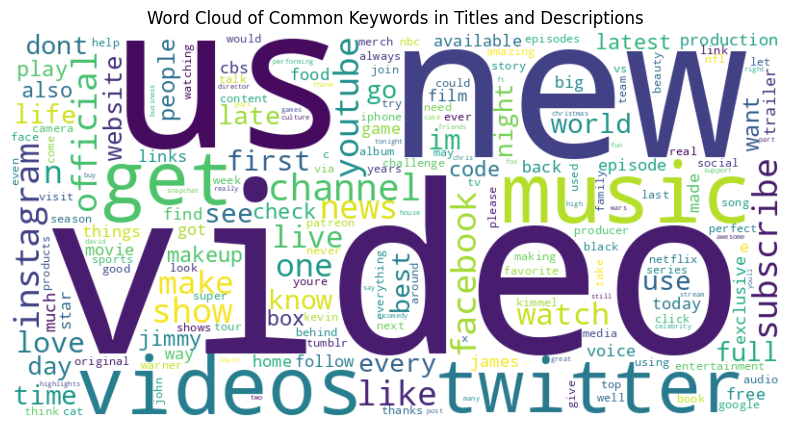

In [33]:

# Combine title and description into a single text column
data['text'] = data['title'] + ' ' + data['description']

# Function to preprocess and tokenize text
stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = str(text)  # Convert to string to handle potential NaN values
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()
    tokens = [token for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return tokens

# Apply text preprocessing and tokenization, handling missing values
data['tokens'] = data['text'].apply(preprocess)

# Calculate word frequencies
word_freq = Counter()
for tokens in data['tokens']:
    word_freq.update(tokens)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Keywords in Titles and Descriptions')
plt.show()


This indicates that, video with title and descriptions that contains the keywords "video","us","new","music" tend to have higher views or trend

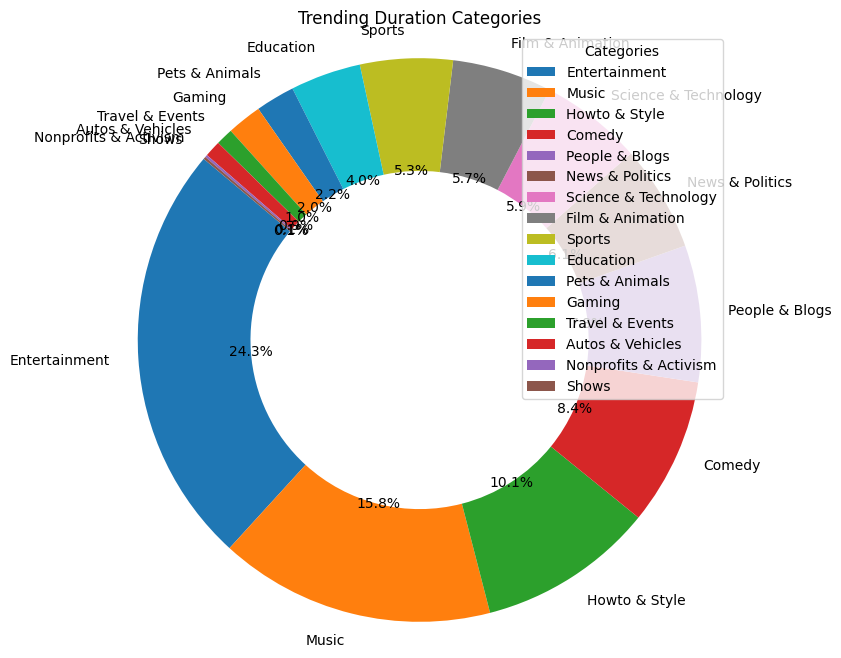

In [34]:

# Data Processing for Donut Graph (Trending Duration Categories)
# Calculate trending duration categories and their counts
trending_duration_counts = data['category_name'].value_counts()

# Create a Donut Graph
plt.figure(figsize=(8, 8))
plt.pie(trending_duration_counts, labels=trending_duration_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.axis('equal')  # Equal aspect ratio ensures that the Donut Graph is circular
plt.title('Trending Duration Categories')
plt.legend(title='Categories', loc='upper right')
plt.show()

